# Import package

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

# pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows',None)

# Load data

In [3]:
match_path = "/content/drive/MyDrive/EPL/dataB/matches.csv"

In [5]:
match_df = pd.read_csv(match_path)
# match_df.drop(['Unnamed: 0'], axis=1, inplace=True)
# match_df = match_df.replace(-1, 0)
match_df.head()

,match_id,season,date,ground,duration,outcome,h_name,h_team_id,h_score,h_formation,...,a_att_obp_goal,h_att_lg_right,a_att_pen_miss,h_att_pen_miss,a_att_lg_left,h_att_obox_own_goal,a_rescinded_red_card,a_att_lg_right,a_att_obox_own_goal,h_att_pen_post
0,93328,2023/24,"Sun 13 Aug 2023, 14:00 BST",Gtech Community Stadium,5700,D,Brentford,130,2,5-3-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93326,2023/24,"Sat 12 Aug 2023, 17:30 BST",St. James' Park,5820,H,Newcastle United,23,5,4-3-3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93325,2023/24,"Sat 12 Aug 2023, 15:00 BST",Goodison Park,5820,A,Everton,7,0,4-4-1-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93327,2023/24,"Sat 12 Aug 2023, 15:00 BST",Bramall Lane,5760,A,Sheffield United,18,0,3-4-3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93323,2023/24,"Sat 12 Aug 2023, 15:00 BST",Vitality Stadium,5820,D,Bournemouth,127,1,4-2-3-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
list(match_df.columns)

['match_id',
 'season',
 'date',
 'ground',
 'duration',
 'outcome',
 'h_name',
 'h_team_id',
 'h_score',
 'h_formation',
 'h_players',
 'h_possession_percentage',
 'h_backward_pass',
 'h_accurate_pass',
 'h_touches',
 'h_total_back_zone_pass',
 'h_total_pass',
 'h_accurate_back_zone_pass',
 'h_final_third_entries',
 'h_open_play_pass',
 'h_successful_final_third_passes',
 'h_total_cross_nocorner',
 'h_rightside_pass',
 'h_won_tackle',
 'h_total_cross',
 'h_total_contest',
 'h_total_final_third_passes',
 'h_fwd_pass',
 'h_leftside_pass',
 'h_long_pass_own_to_opp',
 'h_put_through',
 'h_poss_won_att_3rd',
 'h_total_chipped_pass',
 'h_total_fwd_zone_pass',
 'h_total_long_balls',
 'h_accurate_fwd_zone_pass',
 'h_total_tackle',
 'h_crosses_18yard',
 'h_blocked_pass',
 'h_won_contest',
 'h_ball_recovery',
 'h_poss_lost_all',
 'h_duel_won',
 'h_poss_lost_ctrl',
 'h_passes_right',
 'h_pen_area_entries',
 'h_successful_put_through',
 'h_touches_in_opp_box',
 'h_aerial_won',
 'h_total_flick_on'

# Match EDA

## Home-based ratio

Home Win: 838
Home Draw: 432
Home Lose: 630


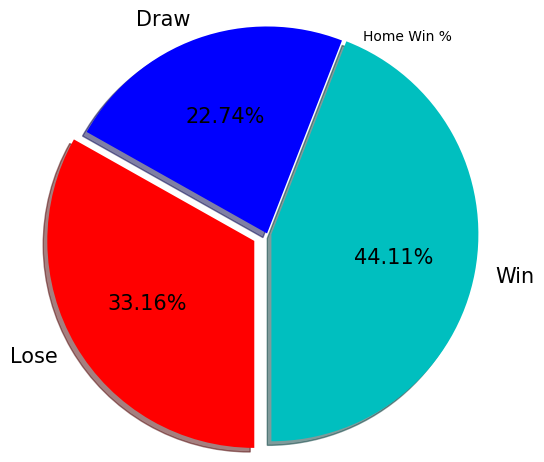

In [14]:
# Ensure counts are non-zero
homewin = len(match_df.loc[match_df['h_score'] > match_df['a_score']])
homedraw = len(match_df.loc[match_df['h_score'] == match_df['a_score']])
homelose = len(match_df.loc[match_df['h_score'] < match_df['a_score']])

print("Home Win:", homewin)
print("Home Draw:", homedraw)
print("Home Lose:", homelose)

# If all values are zero, skip plotting
if homewin == 0 and homedraw == 0 and homelose == 0:
    print("No data available to plot.")
else:
    # Updated pie chart settings
    textprops = {"fontsize": 15}
    explode = [0.03, 0, 0.1]  # Updated for 3 sections
    colors = ["c", "b", "r"]  # Only three colors for three sections

    # Plot pie chart
    plt.pie(
        [homewin, homedraw, homelose],
        labels=['Win', 'Draw', 'Lose'],
        explode=explode,  # To slice the particular section
        colors=colors,    # Color of each section
        autopct="%0.2f%%", # Show data in percentage with 2 decimal points
        shadow=True,      # Show shadow of pie chart
        radius=1.4,       # Radius to increase or decrease the size of pie chart
        startangle=270,   # Start angle of first section
        textprops=textprops
    )
    plt.title('Home Win %', fontsize=10, loc='right')
    plt.show()


## Goal position ratio

In [11]:
for i in list(match_df.columns):
    if "goal" in i and "att" in i:
        print(i)

h_att_lf_goal
h_att_ibox_goal
h_att_goal_low_left
h_att_pen_goal
h_att_goal_low_centre
a_att_ibox_goal
a_att_hd_goal
a_att_goal_high_centre
a_att_obox_goal
a_att_rf_goal
a_att_goal_low_left
h_att_rf_goal
h_att_goal_low_right
h_att_goal_high_right
a_att_goal_high_right
a_att_lf_goal
a_att_goal_low_centre
a_att_goal_high_left
h_att_hd_goal
h_att_goal_high_left
a_att_pen_goal
a_att_ibox_own_goal
a_att_freekick_goal
h_att_obox_goal
a_att_goal_low_right
h_att_goal_high_centre
h_att_freekick_goal
h_att_ibox_own_goal
h_att_obp_goal
a_att_obp_goal
h_att_obox_own_goal
a_att_obox_own_goal


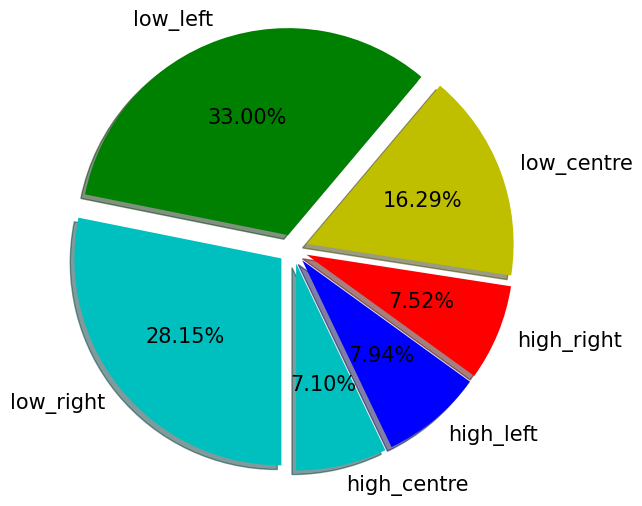

In [13]:
import matplotlib.pyplot as plt
def goalPosition_season(season):
    goal = match_df.loc[match_df['season'] == season]
    goal = goal[['h_att_goal_high_centre', 'h_att_goal_low_centre',
                'h_att_goal_high_left', 'h_att_goal_high_right',
                'h_att_goal_low_left', 'h_att_goal_low_right',
                'a_att_goal_high_centre', 'a_att_goal_low_centre',
                'a_att_goal_high_left', 'a_att_goal_high_right',
                'a_att_goal_low_left', 'a_att_goal_low_right']].sum()
    high_centre = goal['a_att_goal_high_centre'] + goal['h_att_goal_high_centre']
    high_left = goal['a_att_goal_high_left'] + goal['h_att_goal_high_left']
    high_right = goal['a_att_goal_high_right'] + goal['h_att_goal_high_right']
    low_centre = goal['a_att_goal_low_centre'] + goal['h_att_goal_low_centre']
    low_left = goal['a_att_goal_low_left'] + goal['h_att_goal_low_left']
    low_right = goal['a_att_goal_low_right'] + goal['h_att_goal_low_right']

    explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
    colors = ["c", 'b', 'r', 'y', 'g']
    plt.pie([high_centre, high_left, high_right, low_centre, low_left, low_right],labels=['high_centre', 'high_left', 'high_right', 'low_centre', 'low_left', 'low_right'],
            explode=explode,
            colors=colors,
            autopct="%0.2f%%",
            shadow=True,
            radius=1.4,
            startangle=270,
            textprops={"fontsize": 15}  # Fix typo here
            )
    plt.show()

goalPosition_season('2023/24')
